<a href="https://colab.research.google.com/github/Akash7180/Chess-piece-identification/blob/main/chess_pieces.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
! [ -e /content ] && pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 719.8/719.8 KB 15.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 57.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 452.9/452.9 KB 13.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 43.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 213.0/213.0 KB 2.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132.0/132.0 KB 6.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.3/190.3 KB 4.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 25.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 52.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 140.6/140.6 KB 18.1 MB/s eta 0:00:00
Mounted at /content/gdrive


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from fastbook import *
from fastai.vision.widgets import *

In [ ]:
path = Path("/content/drive/MyDrive/ML project/chess-pieces/Chessman-image-dataset/Chess")

In [ ]:
fns=get_image_files(path)

In [ ]:
fns

(#560) [Path('/content/drive/MyDrive/ML project/chess-pieces/Chessman-image-dataset/Chess/Rook/00000015.jpg'),Path('/content/drive/MyDrive/ML project/chess-pieces/Chessman-image-dataset/Chess/Rook/00000016.jpg'),Path('/content/drive/MyDrive/ML project/chess-pieces/Chessman-image-dataset/Chess/Rook/00000002.JPG'),Path('/content/drive/MyDrive/ML project/chess-pieces/Chessman-image-dataset/Chess/Rook/00000014.jpg'),Path('/content/drive/MyDrive/ML project/chess-pieces/Chessman-image-dataset/Chess/Rook/00000004.jpg'),Path('/content/drive/MyDrive/ML project/chess-pieces/Chessman-image-dataset/Chess/Rook/00000017.jpg'),Path('/content/drive/MyDrive/ML project/chess-pieces/Chessman-image-dataset/Chess/Rook/00000007.jpg'),Path('/content/drive/MyDrive/ML project/chess-pieces/Chessman-image-dataset/Chess/Rook/00000008.jpg'),Path('/content/drive/MyDrive/ML project/chess-pieces/Chessman-image-dataset/Chess/Rook/00000006.jpg'),Path('/content/drive/MyDrive/ML project/chess-pieces/Chessman-image-datase

In [ ]:
chess =DataBlock(
    blocks=(ImageBlock,CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=Resize(128)

)

In [ ]:
dls=chess.dataloaders(path)

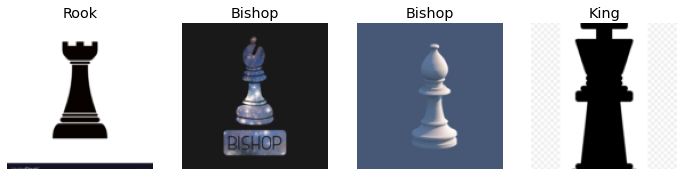

In [ ]:
dls.valid.show_batch(max_n=4, nrows=1)

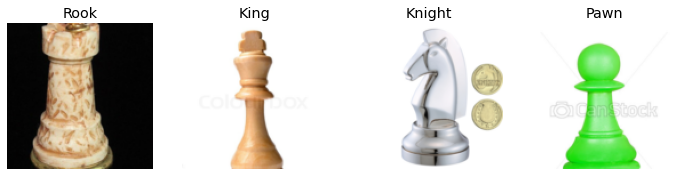

In [ ]:
dls.train.show_batch(max_n=4 ,nrows=1)

In [ ]:
chess = chess.new(
    item_tfms=RandomResizedCrop(224, min_scale=0.5),
    batch_tfms=aug_transforms(size=224, min_scale=0.75)
)
dls = chess.dataloaders(path)

In [ ]:
learn = cnn_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(4)

/usr/local/lib/python3.8/dist-packages/fastai/vision/learner.py:288: UserWarning: `cnn_learner` has been renamed to `vision_learner` -- please update your code
  warn("`cnn_learner` has been renamed to `vision_learner` -- please update your code")
/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pt

  0%|          | 0.00/44.7M [00:00<?, ?B/s]

epoch,train_loss,valid_loss,error_rate,time
0,2.777014,1.455577,0.517857,01:57


epoch,train_loss,valid_loss,error_rate,time
0,1.855908,1.285410,0.437500,00:12
1,1.593246,1.007434,0.366071,00:11
2,1.351324,0.960988,0.321429,00:11
3,1.179479,0.928500,0.303571,00:11


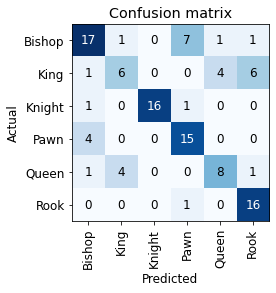

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()


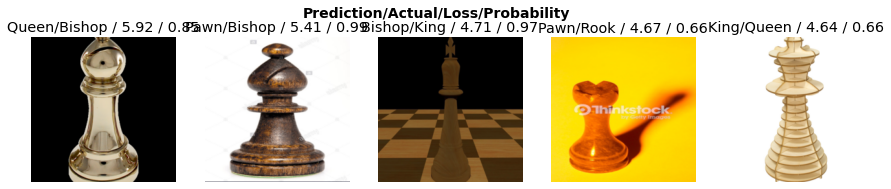

In [ ]:
interp.plot_top_losses(5, nrows=1)


In [ ]:
cleaner = ImageClassifierCleaner(learn)
cleaner


In [ ]:
for idx in cleaner.delete(): cleaner.fns[idx].unlink()
for idx,cat in cleaner.change(): shutil.move(str(cleaner.fns[idx]), path/cat)

In [ ]:
learn.export('/content/drive/MyDrive/chess2.pkl')

/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet34_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet34_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth


  0%|          | 0.00/83.3M [00:00<?, ?B/s]

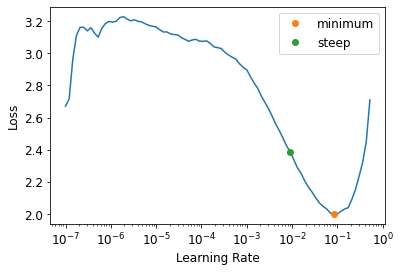

In [ ]:
learn = vision_learner(dls, resnet34, metrics=error_rate)
lr_min,lr_steep = learn.lr_find(suggest_funcs=(minimum, steep))


In [ ]:
learn = vision_learner(dls, resnet34, metrics=error_rate)
learn.fine_tune(4, base_lr=0.1)

epoch,train_loss,valid_loss,error_rate,time
0,2.677238,12.223799,0.678571,00:17


epoch,train_loss,valid_loss,error_rate,time
0,2.515224,554.022217,0.803571,00:12
1,2.332435,537.285095,0.812500,00:12
2,2.135015,47.940495,0.848214,00:12
3,1.871042,13.381836,0.535714,00:12


In [ ]:
interp.most_confused(min_val=3)

[('Bishop', 'Pawn', 7),
 ('King', 'Rook', 6),
 ('King', 'Queen', 4),
 ('Pawn', 'Bishop', 4),
 ('Queen', 'King', 4)]

In [ ]:
learn = vision_learner(dls, resnet34, metrics=error_rate)
learn.fit_one_cycle(3, 3e-3)

epoch,train_loss,valid_loss,error_rate,time
0,2.633612,1.365818,0.455357,00:12
1,1.940554,1.221555,0.348214,00:11
2,1.571369,1.066035,0.321429,00:12


In [ ]:
learn.unfreeze()

SuggestedLRs(valley=0.00013182566908653826)

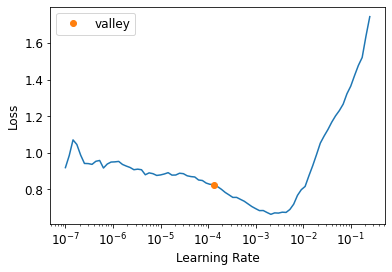

In [ ]:
learn.lr_find()

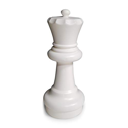

In [ ]:
im = Image.open('/content/drive/MyDrive/ML project/chess-pieces/Chessman-image-dataset/Chess/Queen/00000008.jpg')
im.to_thumb(128,128)

In [ ]:
learn.predict('/content/drive/MyDrive/ML project/chess-pieces/Chessman-image-dataset/Chess/Queen/00000008.jpg')

('King',
 TensorBase(1),
 TensorBase([8.1807e-05, 6.8157e-01, 9.0618e-02, 5.0210e-03, 4.2786e-04, 2.2228e-01]))